<a href="https://colab.research.google.com/github/kosirobwada/SIGNATE/blob/main/StudentCup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SIGNATE/StudentCup/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SIGNATE/StudentCup/test.csv')

In [28]:
train.head()

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
0,0,nashville,1949,bmw,excellent,6 cylinders,gas,115148,clean,manual,rwd,mid-size,convertible,orange,NaN,27587
1,1,state college,2013,toyota,fair,8 cylinders,gas,172038,clean,automatic,rwd,full-size,sedan,silver,pa,4724
2,2,wichita,1998,ford,good,6 cylinders,gas,152492,clean,automatic,fwd,full-size,SUV,silver,ks,10931
3,3,albany,2014,ford,excellent,4 cylinders,gas,104118,clean,manual,fwd,mid-size,SUV,blue,ny,16553
4,4,redding,2005,ford,excellent,6 cylinders,gas,144554,clean,manual,fwd,mid-size,sedan,red,ca,5158


In [29]:
test.head()

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,27532,western slope,2015,chevrolet,excellent,4 cylinders,gas,92553,clean,automatic,fwd,full-size,SUV,red,NaN
1,27533,roseburg,2013,nissan,like new,4 cylinders,gas,134385,salvage,automatic,fwd,mid-size,sedan,black,or
2,27534,akron / canton,2011,volkswagen,good,4 cylinders,gas,102489,clean,automatic,fwd,full-size,sedan,black,oh
3,27535,denver,2016,jeep,excellent,6 cylinders,diesel,64310,clean,automatic,4wd,mid-size,SUV,red,co
4,27536,hickory / lenoir,1999,honda,excellent,8 cylinders,gas,180839,rebuilt,automatic,4wd,mid-size,SUV,silver,nc


In [30]:
print(train.shape)
print(test.shape)

(27532, 16)
(27537, 15)


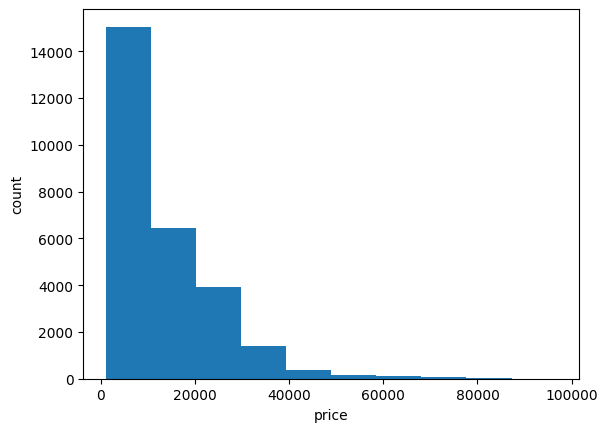

In [31]:
plt.hist(train['price'])
plt.xlabel('price')
plt.ylabel('count')
plt.show()

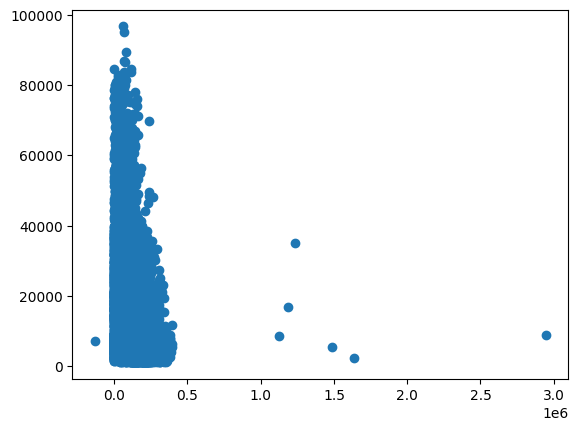

In [32]:
plt.scatter(train['odometer'], train['price'])
plt.show()

In [33]:
train.groupby('condition')['price'].agg(['mean','count'])

,mean,count
condition,,
excellent,14662.392076,15219
fair,7210.345674,2404
good,11022.550674,6009
like new,16511.362730,3810
new,16274.418182,55
salvage,8640.685714,35


In [34]:
train.groupby("manufacturer")["price"].agg(["mean", "count"]).sort_values(by="count", ascending=False)

,mean,count
manufacturer,,
ford,14835.941129,6166
chevrolet,15060.421683,3339
bmw,14014.950292,2736
toyota,9230.764331,1570
honda,8962.536697,1526
...,...,...
ＭＥＲＣＵＲＹ,6302.000000,1
lexuѕ,16867.000000,1
ＭＩＴＳＵＢＩＳＨＩ,13765.000000,1


In [35]:
train = pd.get_dummies(train, columns=["condition", "manufacturer"])
test = pd.get_dummies(test, columns=["condition", "manufacturer"])

In [36]:
train['manufacturer_toyota'].head()

0    0
1    1
2    0
3    0
4    0
Name: manufacturer_toyota, dtype: uint8

In [37]:
train[['condition_excellent', 'condition_fair', 'condition_good', 'condition_like new', 'condition_new', 'condition_salvage']].head()

,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [38]:
#priceは予測対象で学習に必要なため別途targetの変数に格納する
target = train["price"]
#odometer, condition, manufacturer以外を削除
train = train.drop(columns=['id', 'region', 'year', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state', "price"], axis=1)
test = test.drop(columns=['id', 'region', 'year', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state'], axis=1)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(train, target, random_state = 82)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(20649, 132) (6883, 132) (20649,) (6883,)


In [41]:
#scikit-learnはsklearnでインポート可能
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [42]:
#決定木を呼び出しています。決定木は実行するたびに学習結果が変わることがあるのでrandom_stateに数字を指定すると
model = DecisionTreeRegressor(random_state=42)
#model.fit()で学習します。()内に訓練データと訓練データの目的変数を入れると学習できます。
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [44]:
pred = model.predict(X_valid)

In [45]:
print(pred[:5])

[ 7148.  5577.  2846.  2458. 33331.]


In [46]:
#MAPEの評価はmean_absolute_percentage_error(正解データ, 予測データ)で可能です。
score = mean_absolute_percentage_error(y_valid, pred)
print(score*100)

95.43942421293022


In [47]:
predict = model.predict(test)

In [49]:
#submit_sample.csvを読み込みます。
submit = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SIGNATE/StudentCup/submit_sample.csv", header=None)
submit.head()

,0,1
0,27532,14994.540583
1,27533,10004.210369
2,27534,8000.623545
3,27535,15062.223593
4,27536,8994.715270


In [50]:
submit[1] = predict

In [51]:
#submission.csvでデータを保存(提出様式はindex=False, header=Noneとなります。)
submit.to_csv("submission.csv", index=False, header=None)

In [52]:
submit.head()

,0,1
0,27532,4143.0
1,27533,24638.0
2,27534,8758.0
3,27535,18111.0
4,27536,7649.0
